In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


# Data Preprocessing

In [3]:
df = pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.drop(columns=['date'], inplace=True)

In [5]:
df.isnull().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
df[df.duplicated()]

,precipitation,temp_max,temp_min,wind,weather
188,0.0,26.7,12.8,3.8,sun
629,0.0,21.1,13.3,2.5,sun
748,0.0,9.4,0.6,2.2,sun
751,0.0,10.0,1.7,1.5,sun
863,0.0,26.7,12.8,3.8,sun
959,0.0,27.8,15.0,2.8,sun
1019,0.0,20.6,11.1,3.3,sun
1346,0.0,22.8,13.3,2.4,sun


In [7]:
df.head(10)

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain
6,0.0,7.2,2.8,2.3,rain
7,0.0,10.0,2.8,2.0,sun
8,4.3,9.4,5.0,3.4,rain
9,1.0,6.1,0.6,3.4,rain


In [8]:
# Define a mapping dictionary
mapping = {'drizzle': 0, 'fog': 1, 'rain': 2, 'snow': 3, 'sun': 4}

# Apply the mapping 
df['weather'] = df['weather'].map(mapping)
print(df)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9        2
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1461 rows x 5 columns]


## Cleaning Outliers

In [9]:
column = ['precipitation','temp_max','temp_min', 'wind']
df[column].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


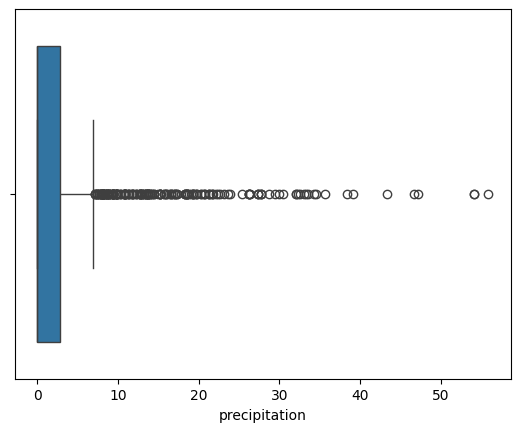

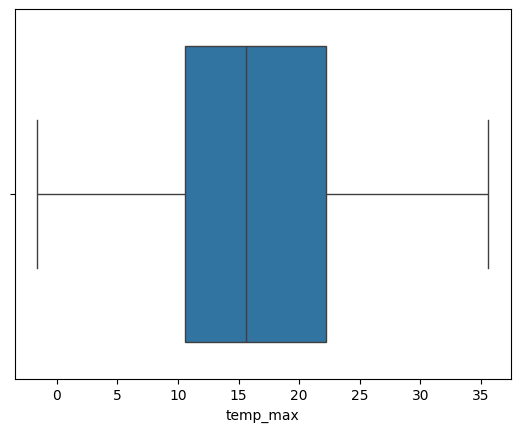

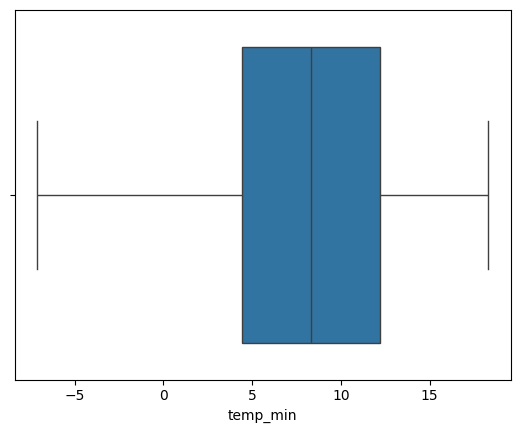

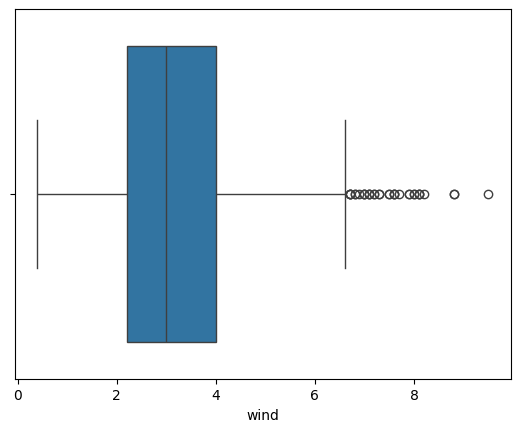

In [10]:
for cols in column:
  sns.boxplot(x=df[cols])
  plt.show()

# K-Means Clustering (Elbow Method)


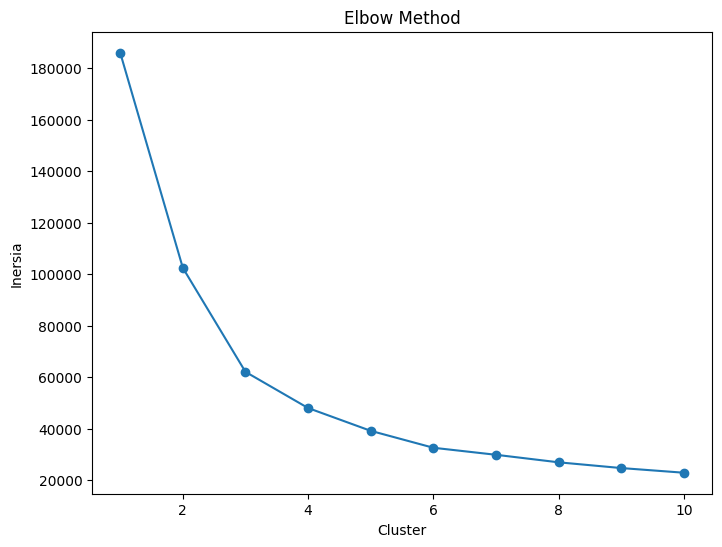

In [11]:
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,  n_init=10)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method')
plt.show()

In [12]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

n_clusters = 5

kmeans = KMeans(n_clusters=n_clusters, random_state=42,  n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_features)

df.to_csv('data_baru.csv', index=False)

In [13]:
df_clean = pd.read_csv("data_baru.csv")
df_clean.head(100)

,precipitation,temp_max,temp_min,wind,weather,cluster
0,0.0,12.8,5.0,4.7,0,1
1,10.9,10.6,2.8,4.5,2,1
2,0.8,11.7,7.2,2.3,2,4
3,20.3,12.2,5.6,4.7,2,2
4,1.3,8.9,2.8,6.1,2,1
...,...,...,...,...,...,...
95,4.6,9.4,2.8,1.8,3,4
96,0.3,11.1,3.3,2.6,2,4
97,0.0,16.1,1.7,4.3,4,1
98,0.0,21.1,7.2,4.1,4,3


# Split Dataset

In [14]:
X = df.drop(['weather','cluster'], axis=1)
y = df['weather']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Development

In [16]:
start_time = time.time()

In [17]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=4)
grid_search.fit(X_train, y_train)

print("Best Parameter", grid_search.best_params_)

best_knn = grid_search.best_estimator_

best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

Best Parameter {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}


In [18]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = best_knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of best_knn model: {accuracy * 100:.2f}%")


Accuracy of best_knn model: 77.13%


**Testing**

In [19]:
input_data = [[10.9,10.6,2.8,4.5]]
best_knn.predict(input_data)

C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)